# Bioinformatics for Drug Discovery



YT: https://www.youtube.com/watch?v=jBlTQjcKuaY&t=186s


GitHub: https://github.com/dataprofessor/code/tree/master/python

## Part 1: Getting data from ChemBL Database

In [1]:
import pandas as pd
#from chembl_webresource_client.new_client import new_client
import numpy as np

In [2]:
from rdkit.Chem import Lipinski, Descriptors
from rdkit import Chem

In [6]:
Target = new_client.target
target_query = Target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,27.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,27.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,17.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,"[{'xref_id': 'P04058', 'xref_name': None, 'xre...",Torpedo californica,Acetylcholinesterase,15.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
4,"[{'xref_id': 'P21836', 'xref_name': None, 'xre...",Mus musculus,Acetylcholinesterase,15.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
5,"[{'xref_id': 'P37136', 'xref_name': None, 'xre...",Rattus norvegicus,Acetylcholinesterase,15.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
6,"[{'xref_id': 'O42275', 'xref_name': None, 'xre...",Electrophorus electricus,Acetylcholinesterase,15.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
7,"[{'xref_id': 'P23795', 'xref_name': None, 'xre...",Bos taurus,Acetylcholinesterase,15.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913
8,[],Anopheles gambiae,Acetylcholinesterase,15.0,False,CHEMBL2046266,"[{'accession': 'Q869C3', 'component_descriptio...",SINGLE PROTEIN,7165
9,[],Bemisia tabaci,AChE2,15.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038


In [7]:
selected_targets = targets.target_chembl_id[0]
selected_targets

'CHEMBL220'

In [8]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_targets).filter(standard_type="IC50")

In [ ]:
res

In [9]:
df = pd.DataFrame.from_dict(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7544,None,20703835,[],CHEMBL4627889,Inhibition of AChE (unknown origin) using acet...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.74
7545,None,20703856,[],CHEMBL4627888,Inhibition of AChE (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.51
7546,None,20708928,[],CHEMBL4628756,Inhibition of human AchE,A,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,125.0
7547,None,20708929,[],CHEMBL4628756,Inhibition of human AchE,A,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,100.0


## Part 2: Data cleaning and initial feature engineering

In [10]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-10-955aac5800f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7544,None,20703835,[],CHEMBL4627889,Inhibition of AChE (unknown origin) using acet...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.74
7545,None,20703856,[],CHEMBL4627888,Inhibition of AChE (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.51
7546,None,20708928,[],CHEMBL4628756,Inhibition of human AchE,A,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,125.0
7547,None,20708929,[],CHEMBL4628756,Inhibition of human AchE,A,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,100.0


In [11]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

<ipython-input-11-d6eca39adde3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7543,None,20703806,[],CHEMBL4627871,Inhibition of human erythrocyte AChE using S-a...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,266.0
7544,None,20703835,[],CHEMBL4627889,Inhibition of AChE (unknown origin) using acet...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.74
7545,None,20703856,[],CHEMBL4627888,Inhibition of AChE (unknown origin),B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.51
7546,None,20708928,[],CHEMBL4628756,Inhibition of human AchE,A,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,125.0


In [12]:
df.canonical_smiles.nunique()

6209

In [13]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr.standard_value

0          750.0
1          100.0
2        50000.0
3          300.0
4          800.0
          ...   
7543    266000.0
7544       740.0
7545       510.0
7546    125000.0
7547    100000.0
Name: standard_value, Length: 5103, dtype: object

In [14]:
df2 =  df2_nr

In [15]:
bioactivity_class = []
for i in df2_nr.standard_value:
    if float(i) >= 10000:
        bioactivity_class.append("inactive")
    elif float(i) <= 1000:
        bioactivity_class.append("active")
    else:
        bioactivity_class.append("intermediate")

In [16]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection].reset_index()
df3

,index,molecule_chembl_id,canonical_smiles,standard_value
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0
...,...,...,...,...
5098,7543,CHEMBL4645476,CN(C)C(=O)Oc1ccc(C(O)CNC2CCCCC2)cc1.Cl,266000.0
5099,7544,CHEMBL4645659,COc1ccc(CCC(=O)Nc2nc(-c3cc4ccccc4oc3=O)cs2)cc1OC,740.0
5100,7545,CHEMBL513063,COc1ccc(-c2csc(NC(=O)CCN3CCCC3)n2)cc1,510.0
5101,7546,CHEMBL4640608,COc1cc(C2C3=C(CCCC3=O)NC3=C2C(=O)CCC3)ccc1OCc1...,125000.0


In [17]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
bioactivity_class

0         active
1         active
2       inactive
3         active
4         active
          ...   
5098    inactive
5099      active
5100      active
5101    inactive
5102    inactive
Name: bioactivity_class, Length: 5103, dtype: object

In [18]:
df3 = pd.concat([df3, bioactivity_class], axis = 1)

In [19]:
df3

,index,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...,...
5098,7543,CHEMBL4645476,CN(C)C(=O)Oc1ccc(C(O)CNC2CCCCC2)cc1.Cl,266000.0,inactive
5099,7544,CHEMBL4645659,COc1ccc(CCC(=O)Nc2nc(-c3cc4ccccc4oc3=O)cs2)cc1OC,740.0,active
5100,7545,CHEMBL513063,COc1ccc(-c2csc(NC(=O)CCN3CCCC3)n2)cc1,510.0,active
5101,7546,CHEMBL4640608,COc1cc(C2C3=C(CCCC3=O)NC3=C2C(=O)CCC3)ccc1OCc1...,125000.0,inactive


In [20]:
df3[df3.bioactivity_class != 'intermediate']

,index,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...,...
5098,7543,CHEMBL4645476,CN(C)C(=O)Oc1ccc(C(O)CNC2CCCCC2)cc1.Cl,266000.0,inactive
5099,7544,CHEMBL4645659,COc1ccc(CCC(=O)Nc2nc(-c3cc4ccccc4oc3=O)cs2)cc1OC,740.0,active
5100,7545,CHEMBL513063,COc1ccc(-c2csc(NC(=O)CCN3CCCC3)n2)cc1,510.0,active
5101,7546,CHEMBL4640608,COc1cc(C2C3=C(CCCC3=O)NC3=C2C(=O)CCC3)ccc1OCc1...,125000.0,inactive


<AxesSubplot:>

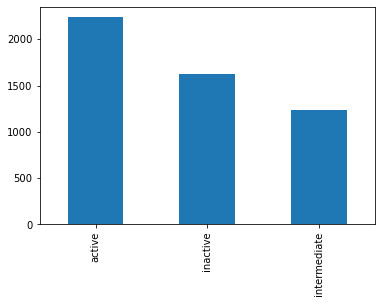

In [21]:
df3['bioactivity_class'].value_counts().plot(kind='bar')

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5103 entries, 0 to 5102
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               5103 non-null   int64 
 1   molecule_chembl_id  5103 non-null   object
 2   canonical_smiles    5103 non-null   object
 3   standard_value      5103 non-null   object
 4   bioactivity_class   5103 non-null   object
dtypes: int64(1), object(4)
memory usage: 199.5+ KB


## Part 3: Using Lipinski and Descriptors from rdkit to calculate parameters

In [23]:
def lipinski(smiles, verbose = False ):
    moldata = []
    for i in smiles:
        mol=Chem.MolFromSmiles(i) 
        moldata.append(mol)
        
    
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [24]:
df3.canonical_smiles

0                   CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1              O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2       CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3           O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4               CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
                              ...                        
5098               CN(C)C(=O)Oc1ccc(C(O)CNC2CCCCC2)cc1.Cl
5099     COc1ccc(CCC(=O)Nc2nc(-c3cc4ccccc4oc3=O)cs2)cc1OC
5100                COc1ccc(-c2csc(NC(=O)CCN3CCCC3)n2)cc1
5101    COc1cc(C2C3=C(CCCC3=O)NC3=C2C(=O)CCC3)ccc1OCc1...
5102    O=C1CCCC2=C1C(c1ccc(OCc3cccc(F)c3)c(Br)c1)C1=C...
Name: canonical_smiles, Length: 5103, dtype: object

In [25]:
Descriptors.MolWt(Chem.MolFromSmiles('O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F'))

404.8450000000001

In [26]:
lipinski(df3.canonical_smiles)

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
5098,342.867,3.1245,2.0,4.0
5099,436.489,4.5050,1.0,7.0
5100,331.441,3.2431,1.0,5.0
5101,447.506,5.1143,1.0,5.0


In [27]:
combined_df  = pd.concat([df3,  lipinski(df3.canonical_smiles)], axis = 1)

In [28]:
combined_df.standard_value = combined_df.standard_value.astype('float64')

In [29]:
combined_df.standard_value

0          750.0
1          100.0
2        50000.0
3          300.0
4          800.0
          ...   
5098    266000.0
5099       740.0
5100       510.0
5101    125000.0
5102    100000.0
Name: standard_value, Length: 5103, dtype: float64

In [3]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(range(len(combined_df)), combined_df.standard_value.astype('float64'))

In [30]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [31]:
df_norm = norm_value(combined_df)

In [35]:
final_df = pIC50(df_norm).drop(columns =['index'])

In [36]:
final_df

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
5098,CHEMBL4645476,CN(C)C(=O)Oc1ccc(C(O)CNC2CCCCC2)cc1.Cl,inactive,342.867,3.1245,2.0,4.0,3.575118
5099,CHEMBL4645659,COc1ccc(CCC(=O)Nc2nc(-c3cc4ccccc4oc3=O)cs2)cc1OC,active,436.489,4.5050,1.0,7.0,6.130768
5100,CHEMBL513063,COc1ccc(-c2csc(NC(=O)CCN3CCCC3)n2)cc1,active,331.441,3.2431,1.0,5.0,6.292430
5101,CHEMBL4640608,COc1cc(C2C3=C(CCCC3=O)NC3=C2C(=O)CCC3)ccc1OCc1...,inactive,447.506,5.1143,1.0,5.0,3.903090


In [ ]:
final_df_2 = final_df[final_df['bioactivity_class'] != 'intermediate']

In [ ]:
final_df_2

In [ ]:
plt.scatter(range(len(final_df_2)), final_df_2.pIC50)

In [ ]:
final_df_2['bioactivity_class'].value_counts().plot(kind='bar')

In [37]:
final_df.to_csv("acetylcholinesterase_df_all.csv", index = False)

## Part 4: Exploratory Data Analysis

In [4]:
df = pd.read_csv(r'acetylcholinesterase_df_all.csv')
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
5098,CHEMBL4645476,CN(C)C(=O)Oc1ccc(C(O)CNC2CCCCC2)cc1.Cl,inactive,342.867,3.1245,2.0,4.0,3.575118
5099,CHEMBL4645659,COc1ccc(CCC(=O)Nc2nc(-c3cc4ccccc4oc3=O)cs2)cc1OC,active,436.489,4.5050,1.0,7.0,6.130768
5100,CHEMBL513063,COc1ccc(-c2csc(NC(=O)CCN3CCCC3)n2)cc1,active,331.441,3.2431,1.0,5.0,6.292430
5101,CHEMBL4640608,COc1cc(C2C3=C(CCCC3=O)NC3=C2C(=O)CCC3)ccc1OCc1...,inactive,447.506,5.1143,1.0,5.0,3.903090


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5103 entries, 0 to 5102
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  5103 non-null   object 
 1   canonical_smiles    5103 non-null   object 
 2   bioactivity_class   5103 non-null   object 
 3   MW                  5103 non-null   float64
 4   LogP                5103 non-null   float64
 5   NumHDonors          5103 non-null   float64
 6   NumHAcceptors       5103 non-null   float64
 7   pIC50               5103 non-null   float64
dtypes: float64(5), object(3)
memory usage: 319.1+ KB


In [6]:
import seaborn as sns
from scipy.stats import mannwhitneyu

In [ ]:
plt.figure(figsize = (6,6))

plt.grid(lw = 0.8, alpha = 0.75)
sns.scatterplot(x='MW', y='LogP', data=df, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)
plt.xlabel('MW')
plt.ylabel('LogP')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')


In [43]:
def mannwhitney(descriptor, verbose=False):
    # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
    from numpy.random import seed
    from numpy.random import randn
    
    # seed the random number generator
    seed(1)

    # actives and inactives
    selection = [descriptor, 'bioactivity_class']
    df0 = df[selection]
    
    active = df0[df0.bioactivity_class == 'active']
    active = active[descriptor]
    
    inactive = df0[df0.bioactivity_class == 'inactive']
    inactive = inactive[descriptor]

    # compare samples
    stat, p = mannwhitneyu(active, inactive)
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    # interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
  
    results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  
    return results

In [ ]:
mannwhitney('pIC50')

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

#plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('LogP')

Statistics=1317008.500, p=0.000
Statistics=1690198.000, p=0.000
Statistics=1281216.500, p=0.000
Statistics=0.000, p=0.000


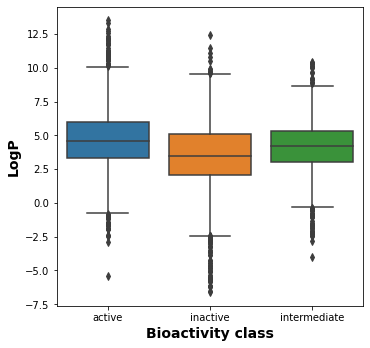

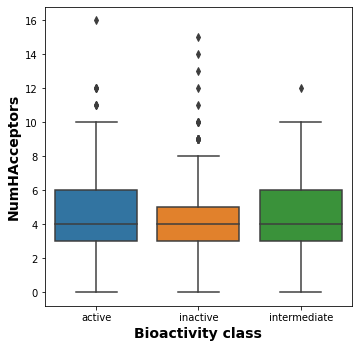

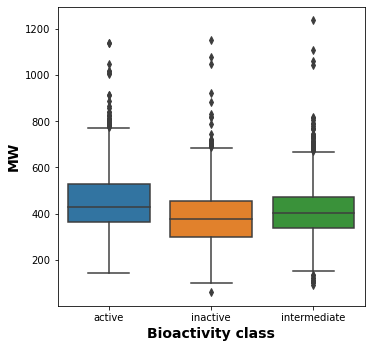

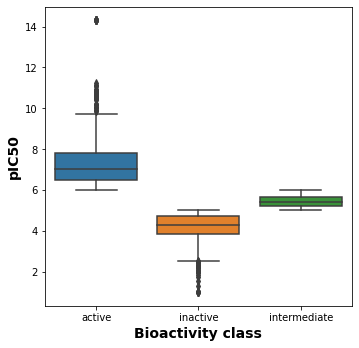

In [44]:
for parameter in ['LogP', 'NumHAcceptors', 'MW', 'pIC50']:
    plt.figure(figsize=(5.5, 5.5))

    sns.boxplot(x = 'bioactivity_class', y = parameter, data = df)

    plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
    plt.ylabel(parameter, fontsize=14, fontweight='bold')
    mannwhitney(parameter)

## Part 5: Making fingerprints by installing padel software

In [3]:
import wget

In [4]:
wget.download("https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip")
wget.download("https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh")

100% [..................................................................................] 231 / 231

'padel.sh'

In [45]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [7]:
!type molecule.smi

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478
CSc1nc(-c2ccc(C)cc2)nn1C(=O)N(C)c1ccccc1	CHEMBL130112
CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)C	CHEMBL130098
CCCCCCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N1CCOCC1	CHEMBL337486
COc1ccc(-c2nc(SC)n(C(=O)N(C)C)n2)cc1	CHEMBL336538
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)c1ccccc1	CHEMBL131051
CCSc1nc(-c2ccc(OC)cc2)nn1C(=O)N1CCOCC1	CHEMBL341437
CSc1nc(-c2ccc3ccccc3c2)nn1C(=O)N(C)C	CHEMBL335033
C[C@H]1C(=O)N(C(=O)NCc2ccccc2)[C@@H]1Oc1ccc(C(=O)C(C)(C)C)cc1	CHEMBL122983
CSc1nc(-c2ccc(-c3ccccc3)cc2)nn1C(=O)N(C)C	CHEMBL338720
CSc1nc(/C=C/c2ccccc2)nn1C(=O)N(C)C	CHEMBL339995
CCCCCCSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N1CCCCC1	CHEMBL335158
CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)c1ccccc1	CHEMBL131536
Cc1c(C(C)C)c(=O)on1C(=O)N1CCC[C@H](C)C1	CHEMBL106126
CC

COc1ccc(CC2=[N+](C)CCc3cc(OC)c(OC)cc32)cc1OC	CHEMBL383242
COc1ccc(Cc2nccc3cc(OC)c(OC)cc23)cc1OC	CHEMBL19224
COc1ccc(C(O)c2nccc3cc(OC)c(OC)cc23)cc1OC	CHEMBL207931
COc1cc2ccnc(C(O)c3ccccc3OC)c2cc1OC	CHEMBL208132
CCC[C@@H](CC1(C(=O)NC2(CO)Cc3ccccc3C2)CCCC1)C(=O)O	CHEMBL211383
CCC[C@@H](CC1(C(=O)Nc2nnc(CC)s2)CCCC1)C(=O)O	CHEMBL211500
CCC[C@@H](CC1(C(=O)Nc2nnc(C)s2)CCCC1)C(=O)O	CHEMBL211450
CCC[C@H](CC1(C(=O)NC2(CO)Cc3ccccc3C2)CCCC1)C(=O)O	CHEMBL212526
CCC[C@H](CC1(C(=O)Nc2nnc(CC)s2)CCCC1)C(=O)O	CHEMBL378763
CCC[C@H](CC1(C(=O)Nc2nnc(C)s2)CCCC1)C(=O)O	CHEMBL378762
CCCC(CC1(c2nnc(Cc3ccccc3)o2)CCCC1)C(=O)O	CHEMBL379950
CCCC(CC1(c2nnc(-c3ccc(=O)n(Cc4ccccc4)c3)o2)CCCC1)C(=O)O	CHEMBL212374
CCc1nnc(NC(=O)C2(CC(CCC(C)C)C(=O)O)CCCC2)s1	CHEMBL213281
CCc1nnc(NC(=O)C2(CC(CCc3ccccc3)C(=O)O)CCCC2)s1	CHEMBL379065
CCc1nnc(NC(=O)C2(CCC(=O)O)CCCC2)s1	CHEMBL212001
CCCCC(CC1(C(=O)Nc2nnc(CC)s2)CCCC1)C(=O)O	CHEMBL212220
CCCC(CC1(C(=O)N[C@H]2CC[C@@H](C(N)=O)CC2)CCCC1)C(=O)O	CHEMBL439508
CCCC(CC1(C(=O)N[C@@H]2CC[C

Cc1ccc(C2C3=C(CC(C)(C)CC3=O)Nc3nc4c(c(N)c32)CCCC4)cc1	CHEMBL513161
CC1(C)CC(=O)C2=C(C1)Nc1nc3c(c(N)c1C2c1ccc(F)cc1)CCCC3	CHEMBL468000
C[C@]1(CO)CCC[C@@]2(C)[C@@H]3CC[C@@H]4C[C@@]3([C@@H](O)C[C@@H]12)[C@H]1O[C@@]41C	CHEMBL556939
C=C1C[C@]23C[C@H]1CC[C@H]2[C@]1(C)CCC[C@](C)(CO)[C@@H]1C[C@@H]3O	CHEMBL561846
CCOC(=O)c1ccc2nc(-c3ccc(Cl)cc3)c3c(c2c1)OCCC3.Cl	CHEMBL550989
Cl.Cl.Cl.O=C(CCc1ccc2nc(-c3ccccc3)c3c(c2c1)OCCC3)NCCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2	CHEMBL3215574
Cl.Cl.Cl.O=C(CCc1ccc2nc(-c3ccccc3)c3c(c2c1)OCCC3)NCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2	CHEMBL3216221
Cl.Cl.Cl.O=C(CCc1ccc2nc(-c3ccccc3)c3c(c2c1)OCCC3)NCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2	CHEMBL3215573
Cl.Cl.O=C(CCc1ccc2nc(-c3ccccc3)c3c(c2c1)OCCC3)NCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2	CHEMBL2448076
Cl.Cl.Cl.O=C(CCc1ccc2nc(-c3ccccc3)c3c(c2c1)OCCC3)NCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2	CHEMBL3216018
Cl.Cl.Cl.Cl.O=C(NCCCCCCCCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2)c1ccc2nc(-c3ccc(Cl)cc3)c3c(c2c1)OCCC3	CHEMBL3215770
Cl.Cl.Cl.Cl.O=C(NCCCCCCCCCNc1c2c(nc3cc

O=C(CCC1CCN(Cc2ccccc2O)CC1)c1cc2c3c(ccn3C(=O)CC2)c1	CHEMBL1651139
O=C(CCC1CCN(Cc2cccc(O)c2)CC1)c1cc2c3c(ccn3C(=O)CC2)c1	CHEMBL1651140
O=C(CCC1CCN(Cc2ccccc2[N+](=O)[O-])CC1)c1cc2c3c(ccn3C(=O)CC2)c1	CHEMBL1651141
O=C(CCC1CCN(Cc2cccc([N+](=O)[O-])c2)CC1)c1cc2c3c(ccn3C(=O)CC2)c1	CHEMBL1651243
O=C(CCC1CCN(Cc2ccccc2)CC1)c1cc2c3c(c1)CCC(=O)N3CCC2	CHEMBL1651244
O=C(CCC1CCN(Cc2ccccc2)CC1)c1cc2c3c(c1)CCN3C(=O)CCC2	CHEMBL1651245
CN1C(=O)Cc2cc3c(CCC4CCN(Cc5ccccc5)CC4)noc3cc21	CHEMBL1179697
CS(=O)(=O)Nc1ccc2c(CCC3CCN(Cc4ccccc4)CC3)noc2c1	CHEMBL1651246
c1ccc(CN2CCC(CCc3noc4cc(C5CCCCC5)ccc34)CC2)cc1	CHEMBL1651247
O=C(CCC1CCN(Cc2ccc(F)cc2)CC1)c1cc2c3c(ccn3C(=O)CC2)c1	CHEMBL1651248
O=C(CCC1CCN(Cc2ccc(O)cc2)CC1)c1cc2c3c(ccn3C(=O)CC2)c1	CHEMBL1651249
O=C(CCC1CCN(Cc2ccc([N+](=O)[O-])cc2)CC1)c1cc2c3c(ccn3C(=O)CC2)c1	CHEMBL1651250
C[N+](C)(CCNC(=O)C(=O)NCC[N+](C)(C)Cc1ccccc1Cl)Cc1ccccc1Cl.[Cl-].[Cl-]	CHEMBL1669479
[Br-].[Br-].c1ccc2c[n+](C[n+]3ccc4ccccc4c3)ccc2c1	CHEMBL1669480
[Br-].[Br-].c1ccc2c[n+](CCC[n+

COc1ccc(C(F)(F)F)c[n+]1CCCCOc1ccc2c(C)cc(=O)oc2c1.O=S(=O)([O-])C(F)(F)F	CHEMBL2441681
COc1ccc(C(F)(F)F)c[n+]1CCCOc1ccc2c(C)cc(=O)oc2c1.O=S(=O)([O-])C(F)(F)F	CHEMBL2441680
COc1ccc(C(F)(F)F)c[n+]1CCCCC[n+]1cc(C(F)(F)F)ccc1OC.O=S(=O)([O-])C(F)(F)F.O=S(=O)([O-])C(F)(F)F	CHEMBL2441679
COc1ccc(C(F)(F)F)c[n+]1CCC[n+]1cc(C(F)(F)F)ccc1OC.O=S(=O)([O-])C(F)(F)F.O=S(=O)([O-])C(F)(F)F	CHEMBL2441678
COc1ccc(C(F)(F)F)c[n+]1CCCCCO.O=S(=O)([O-])C(F)(F)F	CHEMBL2441677
COc1cc2c(cc1OC)C(=O)C(CCCCCCCc1cccc(OC)[n+]1C)C2.O=S(=O)([O-])C(F)(F)F	CHEMBL2441676
COc1cc2c(cc1OC)C(=O)C(CCCCCCc1cccc(OC)[n+]1C)C2.O=S(=O)([O-])C(F)(F)F	CHEMBL2441675
COc1cc2c(cc1OC)C(=O)C(CCCCCc1cccc(OC)[n+]1C)C2.O=S(=O)([O-])C(F)(F)F	CHEMBL2441674
COc1cc2c(cc1OC)C[N+](C)(CCCCCCCc1cccc(OC)[n+]1C)CC2.O=S(=O)([O-])C(F)(F)F.O=S(=O)([O-])C(F)(F)F	CHEMBL2441673
COc1cc2c(cc1OC)C[N+](C)(CCCCCCc1cccc(OC)[n+]1C)CC2.O=S(=O)([O-])C(F)(F)F.O=S(=O)([O-])C(F)(F)F	CHEMBL2441672
COc1cc2c(cc1OC)C[N+](C)(CCCCCc1cccc(OC)[n+]1C)CC2.O=S(=O)([O-])C(F)(F)F.O=

COc1cccc(C(=O)N2c3ccccc3[Se]c3ccccc32)c1	CHEMBL3769833
COc1ccc(C(=O)N2c3ccccc3[Se]c3ccccc32)cc1	CHEMBL3769576
O=C(CCc1ccccc1)N1c2ccccc2[Se]c2ccccc21	CHEMBL3771233
O=C(Cc1ccccc1)N1c2ccccc2[Se]c2ccccc21	CHEMBL3769811
O=C(c1ccccc1)N1c2ccccc2[Se]c2ccccc21	CHEMBL3770569
c1ccc2c(c1)Nc1ccccc1[Se]2	CHEMBL3769834
COc1ccc(C(=O)N2c3ccccc3Sc3ccc(Cl)cc32)cc1OC	CHEMBL3770071
COc1cccc(C(=O)N2c3ccccc3Sc3ccc(Cl)cc32)c1	CHEMBL3770206
COc1ccc(C(=O)N2c3ccccc3Sc3ccc(Cl)cc32)cc1	CHEMBL1801816
O=C(CCc1ccccc1)N1c2ccccc2Sc2ccc(Cl)cc21	CHEMBL3770866
O=C(Cc1ccccc1)N1c2ccccc2Sc2ccc(Cl)cc21	CHEMBL3770516
O=C(c1ccccc1)N1c2ccccc2Sc2ccc(Cl)cc21	CHEMBL1801815
Clc1ccc2c(c1)Nc1ccccc1S2	CHEMBL1411769
COc1ccc(C(=O)N2c3ccccc3Sc3ccccc32)cc1OC	CHEMBL3770356
COc1cccc(C(=O)N2c3ccccc3Sc3ccccc32)c1	CHEMBL1327885
COc1ccc(C(=O)N2c3ccccc3Sc3ccccc32)cc1	CHEMBL239618
O=C(CCc1ccccc1)N1c2ccccc2Sc2ccccc21	CHEMBL240047
O=C(Cc1ccccc1)N1c2ccccc2Sc2ccccc21	CHEMBL394753
O=C(c1ccccc1)N1c2ccccc2Sc2ccccc21	CHEMBL239400
c1ccc2c(c1)Nc1ccccc1S2	CH

COc1cc(CCc2ccc(Nc3c4c(nc5ccccc35)CCCC4)cc2)cc(OC)c1	CHEMBL4093419
COc1cc(CCc2ccc(Nc3c4c(nc5cc(Cl)ccc35)CCCC4)cc2)cc(OC)c1	CHEMBL4083174
CN(C)C(=O)Oc1cc(OC(=O)N(C)C)cc(C(O)CNC(C)(C)C)c1	CHEMBL521589
CCC(C)(C)NCC(O)c1cc(OC(=O)N(C)C)cc(OC(=O)N(C)C)c1.Cl	CHEMBL4096024
CCN(C)C(=O)Oc1cc(OC(=O)N(C)CC)cc(C(O)CNC(C)(C)CC)c1.Cl	CHEMBL4098455
N#CC1=C(N)N2CCNC2=C([N+](=O)[O-])C12c1ccccc1-c1nc3ccccc3nc12	CHEMBL4099598
Cc1cc2nc3c(nc2cc1C)C1(C(C#N)=C(N)N2CCNC2=C1[N+](=O)[O-])c1ccccc1-3	CHEMBL4062146
N#CC1=C(N)N2CCNC2=C([N+](=O)[O-])C12c1ccccc1-c1nc3ccc([N+](=O)[O-])cc3nc12	CHEMBL4083875
N#CC1=C(N)N2CCCNC2=C([N+](=O)[O-])C12c1ccccc1-c1nc3ccccc3nc12	CHEMBL4070769
Cc1cc2nc3c(nc2cc1C)C1(C(C#N)=C(N)N2CCCNC2=C1[N+](=O)[O-])c1ccccc1-3	CHEMBL4091651
N#CC1=C(N)N2CCCNC2=C([N+](=O)[O-])C12c1ccccc1-c1nc3ccc([N+](=O)[O-])cc3nc12	CHEMBL4092602
CC1(C)CNC2=C([N+](=O)[O-])C3(C(C#N)=C(N)N2C1)c1ccccc1-c1nc2ccccc2nc13	CHEMBL4064904
Cc1cc2nc3c(nc2cc1C)C1(C(C#N)=C(N)N2CC(C)(C)CNC2=C1[N+](=O)[O-])c1ccccc1-3	CHEMBL4100338
C

CC(=O)N[C@@H](CCCCn1cc(-c2ccccc2)nn1)C(=O)NCC1CCN(Cc2ccccc2)CC1	CHEMBL4445099
CC(=O)N[C@@H](Cn1cc(-c2ccccc2)nn1)C(=O)NCC1CCN(Cc2ccccc2)CC1	CHEMBL4464964
N[C@@H](CCCCn1cc(-c2ccccc2)nn1)C(=O)NCC1CCN(Cc2ccccc2)CC1	CHEMBL4467345
N[C@@H](Cn1cc(-c2ccccc2)nn1)C(=O)NCC1CCN(Cc2ccccc2)CC1	CHEMBL4520568
CCOc1ccc2[nH]c(SCc3cn(CC4CCN(Cc5ccccc5)CC4)nn3)nc2c1	CHEMBL4557745
c1ccc(CN2CCC(Cn3cc(CSc4nc5ccccc5[nH]4)nn3)CC2)cc1	CHEMBL4446441
COc1cc2ncnc(NCc3cn(CC4CCN(Cc5ccccc5)CC4)nn3)c2cc1OC	CHEMBL4534345
c1ccc(CN2CCC(Cn3cc(CNc4ncnc5ccccc45)nn3)CC2)cc1	CHEMBL4440392
c1ccc(CN2CCC(Cn3cc(Cc4cccc5ccccc45)nn3)CC2)cc1	CHEMBL4437391
O=C(Cc1c[nH]c2ccccc12)NCc1cn(CC2CCN(Cc3ccccc3)CC2)nn1	CHEMBL4448634
O=C1c2ccccc2C(=O)N1Cc1cn(CC2CCN(Cc3ccccc3)CC2)nn1	CHEMBL4574766
COc1cc2c(cc1OC)C(=O)C(Cc1cn(CC3CCN(Cc4ccccc4)CC3)nn1)C2	CHEMBL4438642
Cc1c([C@@H](O)CN2CCN(C[C@H](O)c3ccc4c(c3C)COC4=O)CC2)ccc2c1COC2=O	CHEMBL3696475
Fc1ccc(CNC2CCN(Cc3ccccc3)CC2)c(F)c1	CHEMBL4443695
Fc1ccc(CNC2CCN(Cc3ccccc3)CC2)cc1	CHEMBL1424080
Clc1ccc

In [8]:
!type padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [9]:
! bash padel.sh

Processing CHEMBL133897 in molecule.smi (1/5103). 
Processing CHEMBL336398 in molecule.smi (2/5103). 
Processing CHEMBL131588 in molecule.smi (3/5103). 
Processing CHEMBL130628 in molecule.smi (4/5103). 
Processing CHEMBL130098 in molecule.smi (7/5103). Average speed: 2.93 s/mol.
Processing CHEMBL130112 in molecule.smi (6/5103). Average speed: 4.39 s/mol.
Processing CHEMBL337486 in molecule.smi (8/5103). Average speed: 2.95 s/mol.
Processing CHEMBL130478 in molecule.smi (5/5103). Average speed: 8.65 s/mol.
Processing CHEMBL336538 in molecule.smi (9/5103). Average speed: 1.87 s/mol.
Processing CHEMBL131051 in molecule.smi (10/5103). Average speed: 1.58 s/mol.
Processing CHEMBL341437 in molecule.smi (11/5103). Average speed: 1.38 s/mol.
Processing CHEMBL335033 in molecule.smi (12/5103). Average speed: 1.08 s/mol.
Processing CHEMBL122983 in molecule.smi (13/5103). Average speed: 1.08 s/mol.
Processing CHEMBL338720 in molecule.smi (14/5103). Average speed: 1.01 s/mol.
Processing CHEMBL3399

Processing CHEMBL293751 in molecule.smi (232/5103). Average speed: 0.14 s/mol.
Processing CHEMBL59192 in molecule.smi (233/5103). Average speed: 0.14 s/mol.
Processing CHEMBL300176 in molecule.smi (234/5103). Average speed: 0.14 s/mol.
Processing CHEMBL61905 in molecule.smi (235/5103). Average speed: 0.14 s/mol.
Processing CHEMBL58511 in molecule.smi (236/5103). Average speed: 0.13 s/mol.
Processing CHEMBL59074 in molecule.smi (237/5103). Average speed: 0.13 s/mol.
Processing CHEMBL294674 in molecule.smi (238/5103). Average speed: 0.13 s/mol.
Processing CHEMBL57842 in molecule.smi (239/5103). Average speed: 0.13 s/mol.
Processing CHEMBL299898 in molecule.smi (240/5103). Average speed: 0.13 s/mol.
Processing CHEMBL60596 in molecule.smi (241/5103). Average speed: 0.13 s/mol.
Processing CHEMBL62031 in molecule.smi (242/5103). Average speed: 0.13 s/mol.
Processing CHEMBL59490 in molecule.smi (244/5103). Average speed: 0.13 s/mol.
Processing CHEMBL60074 in molecule.smi (243/5103). Average s

Processing CHEMBL468000 in molecule.smi (1500/5103). Average speed: 0.11 s/mol.
Processing CHEMBL556939 in molecule.smi (1501/5103). Average speed: 0.11 s/mol.
Processing CHEMBL561846 in molecule.smi (1502/5103). Average speed: 0.11 s/mol.
Processing CHEMBL3215574 in molecule.smi (1504/5103). Average speed: 0.11 s/mol.
Processing CHEMBL550989 in molecule.smi (1503/5103). Average speed: 0.11 s/mol.
Processing CHEMBL3216221 in molecule.smi (1505/5103). Average speed: 0.11 s/mol.
Processing CHEMBL3215573 in molecule.smi (1506/5103). Average speed: 0.11 s/mol.
Processing CHEMBL2448076 in molecule.smi (1507/5103). Average speed: 0.11 s/mol.
Processing CHEMBL3216018 in molecule.smi (1508/5103). Average speed: 0.11 s/mol.
Processing CHEMBL3215770 in molecule.smi (1509/5103). Average speed: 0.11 s/mol.
Processing CHEMBL3215769 in molecule.smi (1510/5103). Average speed: 0.11 s/mol.
Processing CHEMBL3215768 in molecule.smi (1511/5103). Average speed: 0.11 s/mol.
Processing CHEMBL3215572 in mole

Processing CHEMBL128780 in molecule.smi (2547/5103). Average speed: 0.13 s/mol.
Processing CHEMBL129577 in molecule.smi (2548/5103). Average speed: 0.13 s/mol.
Processing CHEMBL128390 in molecule.smi (2549/5103). Average speed: 0.13 s/mol.
Processing CHEMBL2236394 in molecule.smi (2550/5103). Average speed: 0.13 s/mol.
Processing CHEMBL2234537 in molecule.smi (2552/5103). Average speed: 0.13 s/mol.
Processing CHEMBL2236393 in molecule.smi (2551/5103). Average speed: 0.13 s/mol.
Processing CHEMBL2234536 in molecule.smi (2553/5103). Average speed: 0.13 s/mol.
Processing CHEMBL2234535 in molecule.smi (2554/5103). Average speed: 0.13 s/mol.
Processing CHEMBL2234534 in molecule.smi (2555/5103). Average speed: 0.13 s/mol.
Processing CHEMBL2234533 in molecule.smi (2556/5103). Average speed: 0.13 s/mol.
Processing CHEMBL2234532 in molecule.smi (2557/5103). Average speed: 0.13 s/mol.
Processing CHEMBL2234531 in molecule.smi (2558/5103). Average speed: 0.13 s/mol.
Processing CHEMBL2234530 in mol

Processing CHEMBL3889713 in molecule.smi (3838/5103). Average speed: 0.14 s/mol.
Processing CHEMBL3889625 in molecule.smi (3839/5103). Average speed: 0.14 s/mol.
Processing CHEMBL3934564 in molecule.smi (3840/5103). Average speed: 0.14 s/mol.
Processing CHEMBL3950063 in molecule.smi (3841/5103). Average speed: 0.14 s/mol.
Processing CHEMBL3984034 in molecule.smi (3842/5103). Average speed: 0.14 s/mol.
Processing CHEMBL3955393 in molecule.smi (3843/5103). Average speed: 0.14 s/mol.
Processing CHEMBL3976003 in molecule.smi (3844/5103). Average speed: 0.14 s/mol.
Processing CHEMBL3928840 in molecule.smi (3845/5103). Average speed: 0.14 s/mol.
Processing CHEMBL3983017 in molecule.smi (3846/5103). Average speed: 0.14 s/mol.
Processing CHEMBL3901794 in molecule.smi (3847/5103). Average speed: 0.14 s/mol.
Processing CHEMBL3945423 in molecule.smi (3850/5103). Average speed: 0.14 s/mol.
Processing CHEMBL3972865 in molecule.smi (3848/5103). Average speed: 0.14 s/mol.
Processing CHEMBL3958208 in 

Processing CHEMBL4555730 in molecule.smi (4998/5103). Average speed: 0.14 s/mol.
Processing CHEMBL4516508 in molecule.smi (4999/5103). Average speed: 0.14 s/mol.
Processing CHEMBL4593917 in molecule.smi (5000/5103). Average speed: 0.14 s/mol.
Processing CHEMBL4551316 in molecule.smi (5001/5103). Average speed: 0.14 s/mol.
Processing CHEMBL4588487 in molecule.smi (5002/5103). Average speed: 0.14 s/mol.
Processing CHEMBL4575730 in molecule.smi (5003/5103). Average speed: 0.14 s/mol.
Processing CHEMBL4540644 in molecule.smi (5004/5103). Average speed: 0.14 s/mol.
Processing CHEMBL4519072 in molecule.smi (5005/5103). Average speed: 0.14 s/mol.
Processing CHEMBL4559797 in molecule.smi (5006/5103). Average speed: 0.14 s/mol.
Processing CHEMBL4527770 in molecule.smi (5007/5103). Average speed: 0.14 s/mol.
Processing CHEMBL4566786 in molecule.smi (5008/5103). Average speed: 0.14 s/mol.
Processing CHEMBL4533530 in molecule.smi (5009/5103). Average speed: 0.14 s/mol.
Processing CHEMBL4554666 in 

## Part 6: Model building

In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

In [9]:
from lazypredict.Supervised import LazyRegressor

ModuleNotFoundError: No module named 'sklearn.utils.testing'

In [ ]:
df

In [12]:
df_X = pd.read_csv('descriptors_output.csv')
df_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130098,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098,CHEMBL513063,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5099,CHEMBL4645659,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5100,CHEMBL4638958,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5101,CHEMBL4640608,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_X = df_X.drop(columns = ['Name'])
df_Y = df['pIC50']

In [14]:
dataset = pd.concat([df_X, df_Y], axis = 1)

In [15]:
dataset.to_csv('Dataset for Modelling', index = False)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [19]:
df_Y.shape


(5103,)

In [20]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
df_X = selection.fit_transform(df_X)

In [22]:
df_X.shape

(5103, 140)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size=0.2)

In [27]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.4554978927567678

In [28]:
Y_pred = model.predict(X_test)

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

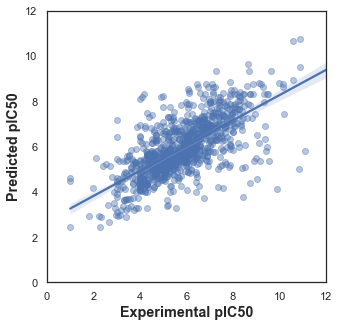

In [29]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [2]:
!python -V

Python 3.9.6
